In [183]:
# !pip install imbalanced-learn

In [184]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [185]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize, LabelEncoder, label_binarize, RobustScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [186]:
fert = pd.read_csv('fertilizer_data.csv')
fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [187]:
fert.shape

(99, 9)

In [188]:
fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [189]:
fert.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [190]:
fert.nunique()

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

In [191]:
fert['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [192]:
fert['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

### EDA (Exploratory Data Analysis)

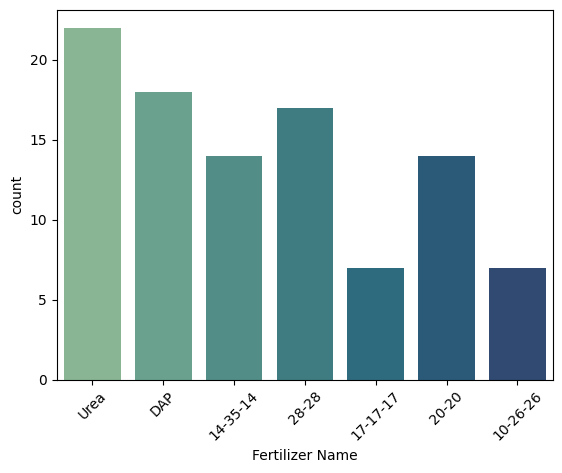

In [193]:
sns.countplot(x='Fertilizer Name', data = fert, palette = "crest")
plt.xticks(rotation = 45)
plt.show()

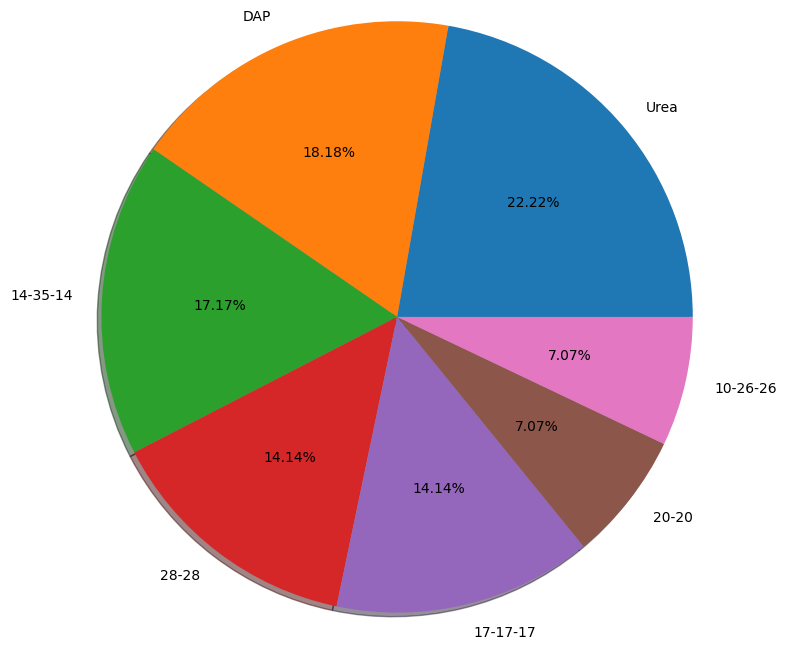

In [194]:
labels = 'Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20','10-26-26'
fig, ax = plt.subplots()
ax.pie(fert['Fertilizer Name'].value_counts(), labels = labels, radius = 2, autopct = '%1.2f%%', shadow = True)
plt.show()

In [195]:
# soil_type_label_encoder = LabelEncoder()
# fert["Soil Type"] = soil_type_label_encoder.fit_transform(fert["Soil Type"])

# crop_type_label_encoder = LabelEncoder()
# fert["Crop Type"] = crop_type_label_encoder.fit_transform(fert["Crop Type"])

# croptype_dict = {}
# for i in range(len(fert["Crop Type"].unique())):
#     croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
# print(croptype_dict)

# soiltype_dict = {}
# for i in range(len(fert["Soil Type"].unique())):
#     soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
# print(soiltype_dict)

In [196]:
fert_label = pd.DataFrame(fert['Fertilizer Name'])
fert_label

,Fertilizer Name
0,Urea
1,DAP
2,14-35-14
3,28-28
4,Urea
...,...
94,28-28
95,10-26-26
96,Urea
97,DAP


In [197]:
le2 = preprocessing.LabelEncoder()
enc_label = fert_label.apply(le2.fit_transform)
fert['Fertilizer'] = enc_label
fert

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Fertilizer
0,26,52,38,Sandy,Maize,37,0,0,Urea,6
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,5
2,34,65,62,Black,Cotton,7,9,30,14-35-14,1
3,32,62,34,Red,Tobacco,22,0,20,28-28,4
4,28,54,46,Clayey,Paddy,35,0,0,Urea,6
...,...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28,4
95,30,60,27,Red,Tobacco,4,17,17,10-26-26,0
96,38,72,51,Loamy,Wheat,39,0,0,Urea,6
97,36,60,43,Sandy,Millets,15,0,41,DAP,5


In [198]:
Fertilizer_Name = {}
for i in range(len(fert["Fertilizer"].unique())):
    Fertilizer_Name[i] = le2.inverse_transform([i])[0]
print(Fertilizer_Name)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [199]:
fert_multi = fert.drop(['Fertilizer Name'], axis = 1)
fert_multi

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,26,52,38,Sandy,Maize,37,0,0,6
1,29,52,45,Loamy,Sugarcane,12,0,36,5
2,34,65,62,Black,Cotton,7,9,30,1
3,32,62,34,Red,Tobacco,22,0,20,4
4,28,54,46,Clayey,Paddy,35,0,0,6
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,4
95,30,60,27,Red,Tobacco,4,17,17,0
96,38,72,51,Loamy,Wheat,39,0,0,6
97,36,60,43,Sandy,Millets,15,0,41,5


In [200]:
y_train_multi = fert_multi[['Fertilizer']]
X_train_multi = fert_multi.drop(labels = ['Fertilizer'], axis = 1)

print('X_train has shape:', X_train_multi.shape, '\ny_train has shape:', y_train_multi.shape)

X_train has shape: (99, 8) 
y_train has shape: (99, 1)


In [201]:
encode_soil = LabelEncoder()

#fitting the label encoder
X_train_multi['Soil Type'] = encode_soil.fit_transform(X_train_multi['Soil Type'])

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [202]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
X_train_multi['Crop Type'] = encode_crop.fit_transform(X_train_multi['Crop Type'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [203]:
fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Fertilizer
0,26,52,38,Sandy,Maize,37,0,0,Urea,6
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,5
2,34,65,62,Black,Cotton,7,9,30,14-35-14,1
3,32,62,34,Red,Tobacco,22,0,20,28-28,4
4,28,54,46,Clayey,Paddy,35,0,0,Urea,6


In [206]:
smote = SMOTE()
X_train_multi, y_train_multi = smote.fit_resample(X_train_multi, y_train_multi)
X_train_multi.shape

(154, 8)

In [207]:
y_train_multi.shape

(154, 1)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X_train_multi, y_train_multi, test_size = 0.2, random_state = 42, shuffle = True)

In [209]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (123, 8)
y_train shape: (123, 1)
X_test shape: (31, 8)
y_test shape: (31, 1)


In [210]:
rs = RobustScaler()
rs.fit(X_train)
X_train_scaled = rs.transform(X_train)
X_test_scaled = rs.transform(X_test)

In [211]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit(y_train)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

In [212]:
y_train_encoded

array([1, 3, 1, 2, 4, 6, 5, 0, 6, 2, 0, 4, 4, 6, 0, 0, 1, 6, 6, 3, 0, 2,
       6, 3, 5, 6, 5, 5, 6, 1, 5, 1, 3, 6, 5, 4, 5, 3, 1, 4, 6, 0, 5, 5,
       4, 2, 4, 2, 2, 6, 1, 3, 0, 4, 3, 1, 5, 2, 3, 0, 1, 6, 1, 3, 4, 2,
       6, 6, 4, 0, 0, 3, 3, 3, 5, 4, 4, 5, 2, 4, 4, 2, 4, 2, 3, 2, 0, 1,
       0, 1, 2, 0, 4, 2, 3, 2, 3, 5, 2, 6, 0, 2, 3, 4, 2, 5, 3, 5, 6, 2,
       0, 0, 1, 6, 5, 1, 5, 3, 6, 0, 5, 6, 0])

In [213]:
y_test_encoded

array([2, 4, 5, 0, 0, 5, 6, 1, 1, 4, 1, 3, 5, 4, 0, 1, 1, 6, 1, 1, 3, 4,
       2, 1, 2, 4, 6, 5, 0, 3, 3])

# Logistic Regression

In [214]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train_encoded)
print('Training accuracy: ', LR.score(X_train_scaled, y_train_encoded) * 100)

Training accuracy:  99.1869918699187


In [215]:
LR_prediction = LR.predict(X_test_scaled)
LR_prediction

array([2, 4, 5, 0, 0, 5, 6, 1, 1, 4, 1, 3, 5, 4, 0, 0, 1, 6, 1, 1, 3, 4,
       2, 1, 2, 4, 6, 5, 0, 3, 3])

In [216]:
print("Classification Report", classification_report(y_test_encoded, LR_prediction))

Classification Report               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.97      0.98      0.97        31
weighted avg       0.97      0.97      0.97        31



### saving trained Logistic Regression model

In [217]:
LR_pkl_filename = 'FS(LogisticRegression).pkl'
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LR, LR_Model_pkl)
LR_Model_pkl.close()

# Random Forest

In [218]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train_encoded)
print('Training accuracy: ', RF.score(X_train_scaled,y_train_encoded) * 100)

Training accuracy:  100.0


In [219]:
RF_prediction = RF.predict(X_test_scaled)
RF_prediction

array([2, 4, 5, 0, 0, 5, 6, 1, 1, 4, 1, 3, 5, 4, 0, 1, 1, 6, 1, 1, 3, 4,
       2, 1, 2, 4, 6, 5, 0, 3, 3])

In [220]:
print("Classification Report", classification_report(y_test_encoded, RF_prediction))

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



### saving trained Random Forest model

In [221]:
RF_pkl_filename = 'FS(RandomForest).pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()

### test 1

In [224]:
data = np.array([[34,67,62,0,1,7,0,30]])
prediction = LR.predict(data)
print(Fertilizer_Name[prediction[0]])

DAP


In [225]:
data = np.array([[34,67,62,0,1,14,14,14]])
prediction = RF.predict(data)
print(Fertilizer_Name[prediction[0]])

10-26-26


### test2

In [226]:
testLR=np.array(X_test)
prediction = LR.predict(testLR)
Fertilizer_Name[prediction[4]]

'14-35-14'

In [227]:
prediction = RF.predict(testLR)
Fertilizer_Name[prediction[4]]

'10-26-26'

In [228]:
test=np.array(y_test)
Fertilizer_Name[test[4][0]]

'10-26-26'

### test3

In [230]:
data = np.array([[34,67,62,0,1,7,0,30]])
prediction = LR.predict(data)
print(Fertilizer_Name[prediction[0]])

DAP


In [231]:
data = np.array([[34,67,62,0,1,14,14,14]])
prediction = RF.predict(data)
print(Fertilizer_Name[prediction[0]])

10-26-26
